###### Content under Creative Commons Attribution license CC-BY 4.0, code under MIT license (c)2014 L.A. Barba, C.D. Cooper, G.F. Forsyth.

# Spreading out

Welcome to the second lesson of the course module: "_Spreading out: parabolic PDEs."_ We're studying the heat equation in one spatial dimension:

\begin{equation}
\frac{\partial T}{\partial t} = \alpha \frac{\partial^2 T}{\partial x^2}
\end{equation}

where $\alpha$ is the thermal diffusivity and $T$ is the temperature.

In the previous lesson, we reviewed the numerical solution of the 1D diffusion equation with a forward-time, centered-space scheme: an _explicit_ scheme. What does that mean?  

The solution for $T$ at timestep $t^{n+1}$ was calculated using different combinations of $T$ values from the *previous* timestep $t^n$.  We have complete knowledge of the parts that feed into the solution update at each spatial point.  

*Implicit* methods work differently: we will use more data from the "future" in the update, including several values of $T$ at $t^{n+1}$. This will make the scheme more difficult to apply, but there are several reasons why it may be worth the effort.

In lesson 1, we discussed two disadvantages of explicit methods: (1) boundary effects drag behind by one time step; (2) stability requirements constrain the time-step to very small values. Both of these issues are resolved by implicit schemes.

## Implicit schemes

Let's move things around a bit and try combining the Euler time step with an evaluation of the spatial derivative on the *updated* solution at $t^{n+1}$. The discretized form of the equation is now as follows:

\begin{equation}\frac{T_{i}^{n+1}-T_{i}^{n}}{\Delta t}=\alpha\frac{T_{i+1}^{n+1}-2T_{i}^{n+1}+T_{i-1}^{n+1}}{\Delta x^2}\end{equation}

The stencil for this discretization doesn't look anything like the other stencils we've used until now. Check it out.

![stencil-implicitcentral](./figures/stencil-implicitcentral.png)
.
#### Figure 1. Stencil of the implicit central scheme.

From the previous time-step, we only know $T_i^{n}$, but what about $T_i^{n+1}$, $T_{i-1}^{n+1}$ and $T_{i+1}^{n+1}$?  What can we do?

No need to panic! Let's start by putting what we *do know* on the right-hand side of the equation and what we *don't know* on the left. We get:

\begin{equation} -T_{i-1}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{i}^{n+1} - T_{i+1}^{n+1} = T_{i}^{n}\frac{\Delta x^2}{\alpha\Delta t} \end{equation} 

It looks like there are a lot of unknowns and just one equation! 

What does it look like with $i=1$?

\begin{equation}-T_{0}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{1}^{n+1} - T_{2}^{n+1} = T_{1}^{n}\frac{\Delta x^2}{\alpha\Delta t} \end{equation}

and $i=2$?

\begin{equation}-T_{1}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{2}^{n+1} - T_{3}^{n+1} = T_{2}^{n}\frac{\Delta x^2}{\alpha\Delta t} \end{equation}

What about $i=3$?

\begin{equation}-T_{2}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{3}^{n+1} - T_{4}^{n+1} = T_{3}^{n}\frac{\Delta x^2}{\alpha\Delta t} \end{equation}

Can you see the common element across equations? Here's a little help:

<img src="./figures/implicit_formula.svg" style="width: 400px;"/>

$T_{i}^{n+1}$ also appears in the equation for $T_{i-1}^{n+1}$ and $T_{i+1}^{n+1}$. We might have enough equations if we apply this for all $i$-values at the same time, don't you think? In fact, this is a linear system of equations for the unknown values $T_{i}^{n+1}$ on the spatial grid.

### What about boundary conditions? 

Let's look at the boundary points of the example from the previous lesson with a Dirichlet BC at $x=0$ and a Neumann BC at $x=1$, discretizing with $N$ mesh points.

The value $T_0^{n+1}$ is known at every time-step from the BC, so putting all unknown terms on the left-hand side of the equation and the known values on the right side yields the following for the $i=1$ equation:

\begin{equation}-T_{2}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{1}^{n+1} = T_{1}^{n}\frac{\Delta x^2}{\alpha\Delta t} + T_{0}^{n+1} \end{equation}

That was easy!

On the other hand, for $i=N-2$, the equation reads

\begin{equation} -T_{N-3}^{n+1} + \left( 2 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{N-2}^{n+1} - T_{N-1}^{n+1} = T_{N-2}^{n}\frac{\Delta x^2}{\alpha\Delta t} \end{equation} 

The discretized Neumann boundary condition on the right side of the rod is

\begin{equation}\frac{T^{n}_{N-1} - T^{n}_{N-2}}{\Delta x} = q.\end{equation}

But we can just as easily write that at time step $n+1$ (the boundary conditions apply at every time-step):

\begin{equation}\frac{T^{n+1}_{N-1} - T^{n+1}_{N-2}}{\Delta x} = q.\end{equation}

Inserting the Neumann boundary condition in the equation for $i=N-2$ yields

\begin{equation} - T_{N-3}^{n+1} + \left( 1 + \frac{\Delta x^2}{\alpha\Delta t}\right) T_{N-2}^{n+1} = T_{N-2}^{n}\frac{\Delta x^2}{\alpha\Delta t} + \Delta x q \end{equation}

Make sure you work this out with pen and paper: it's important to recognize where these terms come from!

Now we can write the linear system of equations in matrix form as follows:

$$[A][x] = [b]+[b]_{b.c.}$$

where the matrix of coefficients $[A]$ is a sparse matrix—most of the matrix elements are zero—with three non-zero diagonals. We write below the system expanded out, so you can see the structure of the matrix, with $\sigma=\frac{\alpha\Delta t}{\Delta x^2}$:

\begin{align}\left[ \begin{array}{cccccc}
 \left(2 + \frac{1}{\sigma}\right) & -1 & 0 & \cdots & & 0 \\
 -1 & \left(2 + \frac{1}{\sigma}\right) & -1 & 0 & \cdots & 0 \\
 0 & & \ddots& & & \vdots \\
 \vdots & & & & \left(2 + \frac{1}{\sigma}\right)& \\
 0 & \cdots & & & -1 & \left(1 + \frac{1}{\sigma}\right) \end{array} \right]
 \cdot 
 \left[ \begin{array}{c} 
 T_1^{n+1} \\ T_2^{n+1} \\ \vdots \\ \\ T_{N-2}^{n+1} \end{array} \right]
 =
 \left[ \begin{array}{c} 
T_1^n \frac{1}{\sigma} \\ T_2^{n}\frac{1}{\sigma} \\ \vdots \\ \\ T_{N-2}^{n}\frac{1}{\sigma} \end{array} \right]
 +
 \begin{bmatrix}
  T_0^{n+1}\\
  0\\\\
  \vdots\\\\
  0\\
  q\Delta x
 \end{bmatrix}
 \end{align} 
 

 
Notice that the Dirichlet boundary condition adds only a term to the right-hand side of the system.  The Neumann boundary condition both adds a term to the right-hand side and modifies the matrix $[A]$.

### Problem set up

We'll re-use the problem from lesson 1: we have a graphite rod, with [thermal diffusivity](http://en.wikipedia.org/wiki/Thermal_diffusivity) $\alpha=1.22\times10^{-3} {\rm m}^2/{\rm s}$, length $L=1{\rm m}$, and temperature held at $T=100{\rm C}$ on the left end, $x=0$, and $0{\rm C}$ everywhere else intially. We'll compute the evolution of temperature on the length of the rod.

Let's start like we did in the previous lesson: import your libraries and set up the discretization.

In [1]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [2]:
L = 1.
nt = 100
nx = 51
alpha = 1.22e-3

q = 0.

dx = L/(nx-1)

qdx = q*dx

Ti = numpy.zeros(nx)
Ti[0] = 100

### Solving a linear system

We need to solve the linear system of equations written above to advance the solution in time. Luckily, we can rely on our friends from SciPy who have developed some nice linear solvers, so we don't need to write our own.

From `scipy.linalg`, let's import `solve`: a function to solve linear systems. Make sure to explore the documentation of [`scipy.linalg`](http://docs.scipy.org/doc/scipy-0.14.0/reference/linalg.html). We'll need to define our own custom functions to generate the coefficient matrix and the right-hand side of the linear system. You should carefully study the code below.

In [3]:
from scipy.linalg import solve

In [4]:
def generateMatrix(N, sigma):
    """ Computes the matrix for the diffusion equation with backward Euler
        Dirichlet condition at i=0, Neumann at i=-1
    
    Parameters:
    ----------
    T: array of float
        Temperature at current time step
    sigma: float 
        alpha*dt/dx^2
    
    Returns:
    -------
    A: 2D numpy array of float
        Matrix for diffusion equation
    """
   
    # Setup the diagonal
    d = numpy.diag(numpy.ones(N-2)*(2+1./sigma))
    
    # Consider Neumann BC
    d[-1,-1] = 1+1./sigma
    
    # Setup upper diagonal
    ud = numpy.diag(numpy.ones(N-3)*-1, 1)
    
    # Setup lower diagonal
    ld = numpy.diag(numpy.ones(N-3)*-1, -1)
    
    A = d + ud + ld
    
    return A

In [5]:
def generateRHS(T, sigma, qdx):
    """ Computes right-hand side of linear system for diffusion equation
        with backward Euler
    
    Parameters:
    ----------
    T: array of float
        Temperature at current time step
    sigma: float
        alpha*dt/dx^2
    qdx: float
        flux at right boundary * dx
    
    Returns:
    -------
    b: array of float
        Right-hand side of diffusion equation with backward Euler
    """
    
    b = T[1:-1]*1./sigma
    # Consider Dirichlet BC
    b[0] += T[0]
    # Consider Neumann BC
    b[-1] += qdx
    
    return b

Next, we'll define a function that steps in time using the implicit central-space scheme.  Remember that for an implicit method, a step in time is performed by solving the entire linear system. This is a fundamental difference between implicit and explicit methods, and implies a considerable computational cost.

In [6]:
def implicit_ftcs(T, A, nt, sigma, qdx):
    """ Advances diffusion equation in time with implicit central scheme
   
    Parameters:
    ----------
    T: array of float
        initial temperature profile
    A: 2D array of float
        Matrix with discretized diffusion equation
    nt: int
        number of time steps
    sigma: float
        alpha*td/dx^2
        
    qdx: float
        flux at right boundary * dx
    Returns:
    -------
    T: array of floats
        temperature profile after nt time steps
    """
    
    for t in range(nt):
        Tn = T.copy()
        b = generateRHS(Tn, sigma, qdx)
        # Use numpy.linalg.solve
        T_interior = solve(A,b)
        T[1:-1] = T_interior
        # Enforce Neumann BC (Dirichlet is enforced automatically)
        T[-1] = T[-2] + qdx

    return T

We solve the linear system for every time step, but the $A$ matrix does not change. Thus, you can generate it only once and then use it as an input parameter to the time-stepping function. Let's try this out! 

In [7]:
sigma = 0.5
dt = sigma * dx*dx/alpha 
nt = 1000

A = generateMatrix(nx, sigma)

It's always a good idea to check your matrix...

In [8]:
print(A)

[[ 4. -1.  0. ...,  0.  0.  0.]
 [-1.  4. -1. ...,  0.  0.  0.]
 [ 0. -1.  4. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  4. -1.  0.]
 [ 0.  0.  0. ..., -1.  4. -1.]
 [ 0.  0.  0. ...,  0. -1.  3.]]


Looks good! 

Now, we apply the time iteration with our very own function `implicit_ftcs()`.

In [9]:
T = implicit_ftcs(Ti.copy(), A, nt, sigma, qdx)

Now plot the solution!

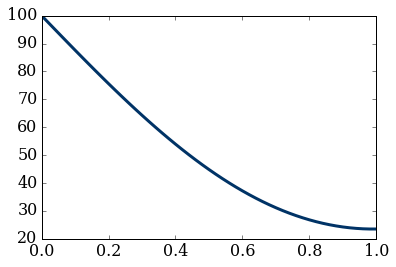

In [10]:
pyplot.plot(numpy.linspace(0,1,nx), T, color='#003366', ls='-', lw=3);

Not too impressive, this looks just like the result from *explicit* forward in time, centered in space for $\alpha\frac{\Delta t}{\Delta x^2} = \frac{1}{2}$. 

But try $\alpha\frac{\Delta t}{\Delta x^2} = 5$, which violates the stability condition of the *explicit* scheme:

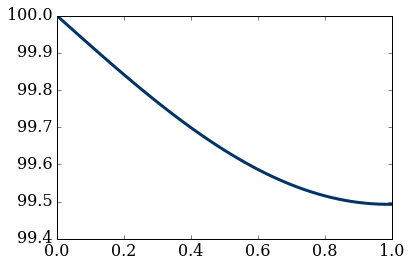

In [11]:
sigma = 5.0

A = generateMatrix(nx, sigma)

T = implicit_ftcs(T.copy(), A, nt, sigma, qdx)

pyplot.plot(numpy.linspace(0,1,nx), T, color='#003366', ls='-', lw=3);

**It didn't blow up!**

We were not able to use such a large time step with the explicit scheme. You can try out other values of `sigma` and you'll get a stable solution. In fact, this is an *unconditionally stable* scheme—the most valuable feature of implicit methods is that they give stable solutions without a constraint on the choice of time step. 

Using the implicit scheme, we can always advance in time using larger time steps. But each time step requires the solution of a linear system, which is computationally expensive. This is the trade-off between explicit and implicit methods. 
To experiment further, set different values of the Neumann boundary flux and see if the solution behaves as you expect.

##### A word of warning

Implicit methods allow you to use significantly larger time steps, because they are not subject to stability constraints. But that doesn't mean you can use just _any_ large time step! Remember that Euler's method is a first-order method, so the _accuracy_ gets worse as you increase the time step, in direct proportion. In fact, you can lose the ability to capture the correct physics if your time step is too large. Numerical stability does not imply accuracy!

##### Dig deeper

You see how matrix `A` is mostly full of zeros?  We call such a matrix *sparse*, and there are many ways to make more efficient calculations taking advantage of their particular structure. First of all, you can optimize the memory usage. Check out SciPy's [sparse-matrix storage formats](http://docs.scipy.org/doc/scipy-0.14.0/reference/sparse.html): you don't need too store $(N-2)^2$ elements! For example, a `coo_matrix` format stores only $3*N_\text{nonzero}$, where $N_\text{nonzero}$ is the number of non-zero elements in `A`. Make sure to explore this topic a little more. It's an important topic in numerical PDEs.

---
###### The cell below loads the style of the notebook

In [12]:
from IPython.core.display import HTML
css_file = '../../styles/numericalmoocstyle.css'
HTML(open(css_file, "r").read())